In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.unicode']=False
import os
os.getcwd()
#from Isotope_CR import isotope
from Isotope_CR import Nuclei


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [2]:
#LOAD DATA AT HOME
# READ IN SOME MODELS. PICK 3 FOR TESTING
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
from get_splines import *
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#'C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'

tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
# Get some specific models
models_to_find=["GALPROP/runs_L_D/L_3_D_6/nuclei_full_56_L_3_D_6", "GALPROP/runs_L_D/L_3_D_3/nuclei_full_56_L_3_D_3","GALPROP/runs_L_D/L_7_D_6/nuclei_full_56_L_7_D_6"]
#tar = tarfile.open("runs_L_D.tar.gz")
k=0
names=[]
FITS_data_full=[]
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#while k<:
while k<len(list_found): 
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    if (tar.getmembers()[j].name==models_to_find[0]) or (tar.getmembers()[j].name==models_to_find[1]) or (tar.getmembers()[j].name==models_to_find[2]):
        fileFITS_data = fits.getdata(open_file)
        print(tar.getmembers()[j].name)
        print(type(fileFITS_data))
        print(fileFITS_data.shape)
        for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
            fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
        fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
        #FITS_data_full.append(fileFITS_data)
        # append to the arrays we need instead:
        names.append(tar.getmembers()[j].name)
        fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [3]:
#get energy axis and change to GeV/nuc (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy_mev_nuc=energy.copy()
energy=np.true_divide(energy,10**3) #now in GeV/nuc
### ALL ISOTOPES FLUXES HAVE SAME ENERGY AXIS (GeV/n) ORIGINALLY ###
# now get isotopes fluxes example Be-10
model=0 # which model being looked at
#try out an isotope class
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
#from Isotope_CR import isotope
#be_10_obj=isotope('Be-10',10,4)
from Isotope_CR import Nuclei
from Isotope_CR import *
b_obj=make_boron_nuclei("boron",5,energy,0,0.6,2000,fluxes_per_element_full)
c_obj=make_carbon_nuclei("carbon",6,energy,0,0.6,2000,fluxes_per_element_full)
o_obj=make_oxygen_nuclei("oxygen",8,energy,0,0.6,2000,fluxes_per_element_full)

2


def flux_ratio_versus_x(numerator_x,numerator_y,denominator_x,denominator_y,spline_steps):
    num_x=np.array(log_energy(numerator_x.copy()))
    den_x=np.array(log_energy(denominator_x.copy()))
    x_list=[num_x,den_x]
    num_y=np.array(log_energy(numerator_y.copy()))
    den_y=np.array(log_energy(denominator_y.copy()))
    y_list=[num_y,den_y]
    #common x range
    spline_min_x,spline_max_x=find_interpolation_range(*x_list)
    #numerator
    num_x_rtn,num_y_rtn=spline(num_x,num_y, spline_steps,spline_min_x,spline_max_x)
    num_x_rtn=np.array(undo_log_energy(num_x_rtn))
    num_y_rtn=np.array(undo_log_energy(num_y_rtn))
    #denominator
    den_x_rtn,den_y_rtn=spline(den_x,den_y, spline_steps,spline_min_x,spline_max_x)
    den_x_rtn=np.array(undo_log_energy(den_x_rtn))
    den_y_rtn=np.array(undo_log_energy(den_y_rtn))
    ratio=np.true_divide(num_y_rtn,den_y_rtn)
    return num_x_rtn,ratio

B_C_rigidity1,B_C_ratio_rigidity1=flux_ratio_versus_x(b_obj.rigidity,b_obj.flux_rigidity,c_obj.rigidity,c_obj.flux_rigidity,2000)

In [4]:
B_C_ratio_obj=Ratio("Boron-Carbon Ratio")

In [5]:
B_C_ratio_obj=Ratio("Boron-Carbon Ratio")
B_C_ratio_obj.add_nuclei(b_obj,c_obj,2000)

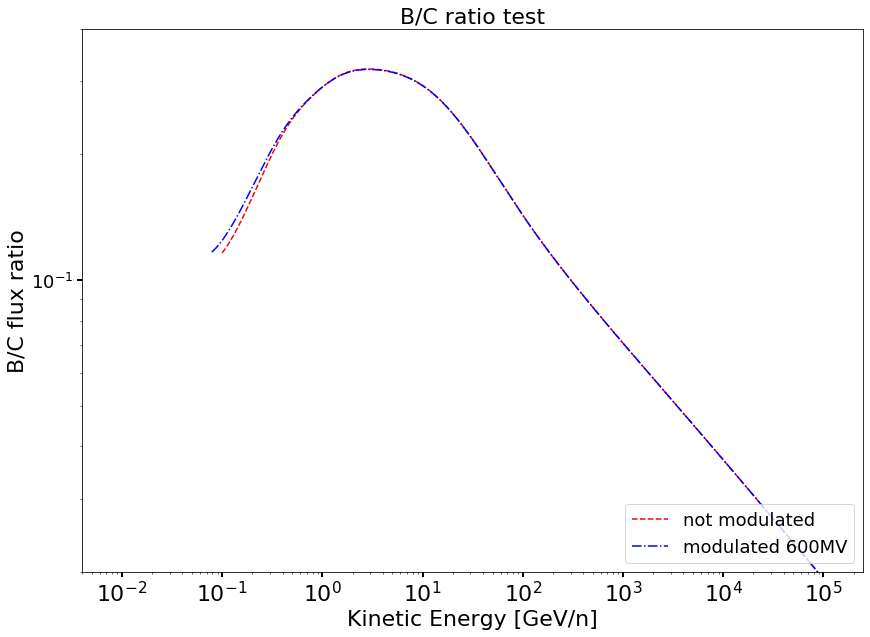

In [6]:
def make_plot_ratio_modulated(energy1,energy2,flux1,flux2):
    fnt=22
    x1=4*10**-3
    x2=2.5*10**5
    y1=0.02
    y2=0.4

    plt.figure(figsize=(14,10))

    plt.plot(energy1,flux1,'r--',label="not modulated")
    plt.plot(energy2,flux2,'b-.',label="modulated 600MV")
    #plt.plot(energy3,10**(-2)*flux3,'k',marker="X",ms=2,label="O-not modulated")
    #plt.plot(energy4,10**(-2)*flux4,'c',marker="o",ms=2,label="O-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Kinetic Energy [GeV/n]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("B/C flux ratio",fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("B/C ratio test", fontsize=fnt)
    plt.savefig("B_C_ratio_test_modulated.png")
    #don't show on supercomputer
    plt.show()
make_plot_ratio_modulated(B_C_ratio_obj.energy_per_nucleon,B_C_ratio_obj.energy_per_nucleon_modulated,
                          B_C_ratio_obj.ratio_energy_per_nucleon,B_C_ratio_obj.ratio_energy_per_nucleon_modulated)

In [7]:
b_obj.list_isotopes[0].name

'B-10'

In [8]:
def flux_ratio_versus_energypn(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.energy_per_nucleon.copy()))
    den_r=np.array(log_energy(denominator.energy_per_nucleon.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_energy_per_nucleon.copy()))
    den_f=np.array(log_energy(denominator.flux_energy_per_nucleon.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio
def flux_ratio_versus_energypn_modulated(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.energy_per_nucleon_modulated.copy()))
    den_r=np.array(log_energy(denominator.energy_per_nucleon_modulated.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_energy_per_nucleon_modulated.copy()))
    den_f=np.array(log_energy(denominator.flux_energy_per_nucleon_modulated.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio
def flux_ratio_versus_rigidity(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.rigidity.copy()))
    den_r=np.array(log_energy(denominator.rigidity.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_rigidity.copy()))
    den_f=np.array(log_energy(denominator.flux_rigidity.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio
def flux_ratio_versus_rigidity_modulated(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.rigidity_modulated.copy()))
    den_r=np.array(log_energy(denominator.rigidity_modulated.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_rigidity_modulated.copy()))
    den_f=np.array(log_energy(denominator.flux_rigidity_modulated.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio

In [9]:
B_C_energypn,B_C_ratioepn=flux_ratio_versus_energypn(b_obj,c_obj,2000)
B_C_energypn_mod,B_C_ratioepn_mod=flux_ratio_versus_energypn_modulated(b_obj,c_obj,2000)


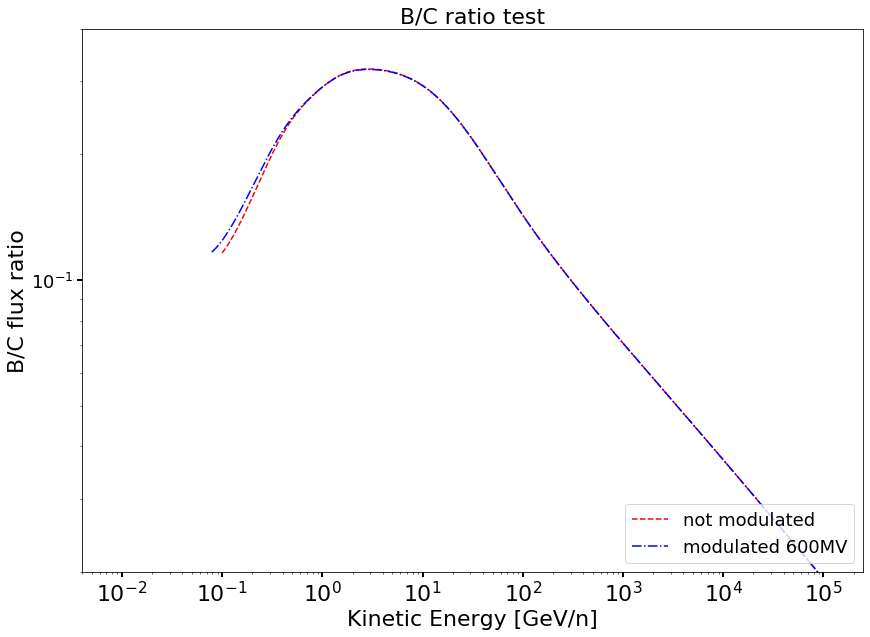

In [10]:
make_plot_ratio_modulated(B_C_energypn,B_C_energypn_mod,B_C_ratioepn,B_C_ratioepn_mod)

In [11]:
def make_plot_comp_solarmod_total(energy1,energy2,energy3,energy4,flux1,flux2,flux3,flux4):
    fnt=22

    #x1=0.5*energy2.min()
    x1=0
    x2=2

    y1=10**-7
    y2=10**-6

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r--',label="Btotal-not modulated")
    plt.plot(energy2,flux2,'b-.',label="Btotal-modulated 600MV")
    plt.plot(energy3,flux3,'k--',label="Ctotal-not modulated")
    plt.plot(energy4,flux4,'c-.',label="Ctotal-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")

    #plt.xscale("log")
    #plt.yscale("log")
    plt.xlabel("Rigidity [GV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("total flux "r'$m^{-2} s^{-1} sr^{-1} (GeV)^{-1}}$',fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    #plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("Solar Modulation test", fontsize=fnt)
    plt.savefig("solar_modulation_test_B_and_C.png")
    #don't show on supercomputer
    plt.show()

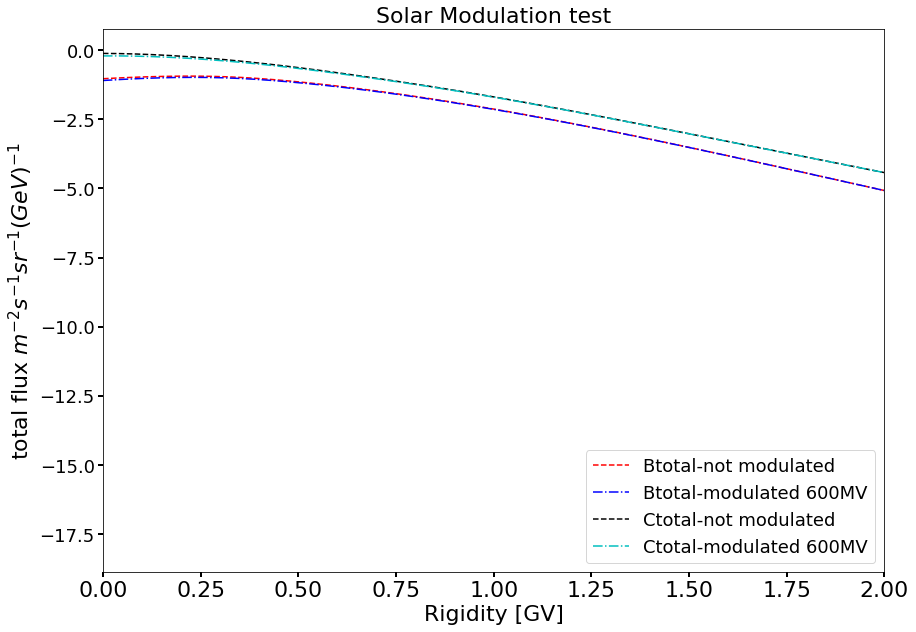

In [12]:
rigl=[]
fluxl=[]
fluxl.append(b_obj.flux_rigidity.copy())
fluxl.append(b_obj.flux_rigidity_modulated.copy())
rigl.append(b_obj.rigidity.copy())
rigl.append(np.array(b_obj.rigidity_modulated.copy()))
fluxl.append(c_obj.flux_rigidity.copy())
fluxl.append(c_obj.flux_rigidity_modulated.copy())
rigl.append(c_obj.rigidity.copy())
rigl.append(np.array(c_obj.rigidity_modulated.copy()))
i=0 
while i < len(rigl):
    rigl[i]=log_energy(rigl[i].copy())
    fluxl[i]=log_energy(fluxl[i].copy())

    i+=1
make_plot_comp_solarmod_total(*rigl,*fluxl)

In [13]:
def make_plot_ratio(energy1,energy2,flux1,flux2):
    fnt=22
    x1=2*10**-1
    x2=2.5*10**3
    y1=0.03
    y2=0.4

    plt.figure(figsize=(14,10))

    plt.plot(energy1,flux1,'r--',label="not modulated")
    plt.plot(energy2,flux2,'b-.',label="modulated 600MV")
    #plt.plot(energy3,10**(-2)*flux3,'k',marker="X",ms=2,label="O-not modulated")
    #plt.plot(energy4,10**(-2)*flux4,'c',marker="o",ms=2,label="O-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Rigidity [GV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("B/C flux ratio",fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("B/C ratio test", fontsize=fnt)
    plt.savefig("B_C_ratio_test_modulated_r.png")
    #don't show on supercomputer
    plt.show()

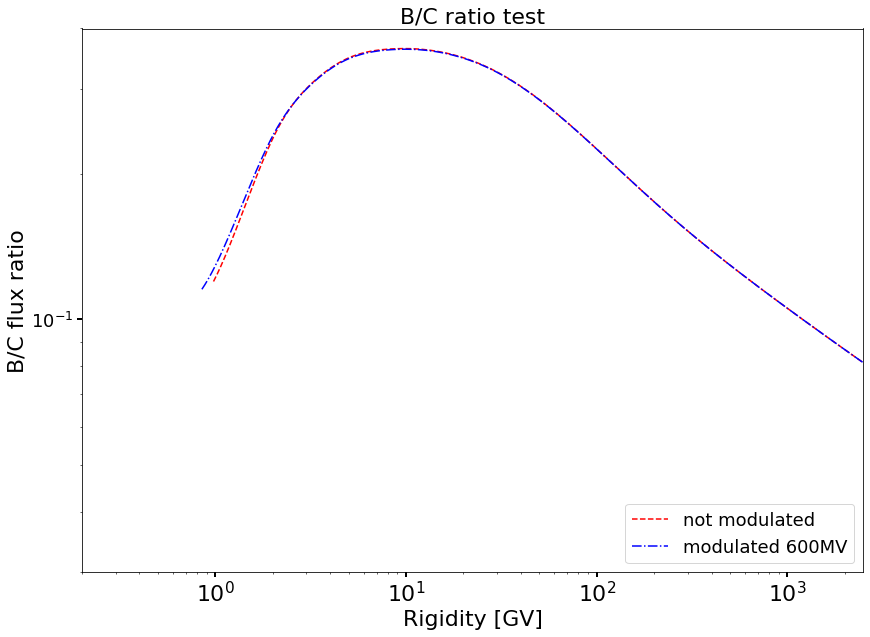

In [14]:
B_C_rigidity,B_C_ratior=flux_ratio_versus_rigidity(b_obj,c_obj,2000)
B_C_rigidity_mod,B_C_ratior_mod=flux_ratio_versus_rigidity_modulated(b_obj,c_obj,2000)

make_plot_ratio(B_C_rigidity,B_C_rigidity_mod,B_C_ratior,B_C_ratior_mod)

In [15]:
# fit spectral index for this ratio above some cutoff (respect AMS) 
R_cutoff=65 #GV
from scipy.optimize import curve_fit
def B_C_rigidity_power_law(R, A, GAMMA):
    return A * (R)**(GAMMA)

In [16]:
#apply it to the modulated and unmodulated above the cutoff

In [17]:
bounds=[[10**-10,10**-8],[10**2,10**4],[0,3],[10**3,10**5],[0,5],[0,2]]
poptBC, pcovBC = curve_fit(B_C_rigidity_power_law, B_C_rigidity[B_C_rigidity>R_cutoff], B_C_ratior[B_C_rigidity>R_cutoff],[10,-0.75],bounds=(-2,[1000,2]))
poptBC

array([ 0.90301418, -0.30620311])

In [18]:
#if you want to plot it, do plt.plot(xdata, func(xdata, *popt))
def make_plot_ratio_fit(energy1,energy2,energy3,flux1,flux2,flux3):
    fnt=22
    x1=2*10**-1
    x2=2.5*10**3
    y1=0.03
    y2=0.4

    plt.figure(figsize=(14,10))

    plt.plot(energy1,flux1,'r--',label="not modulated")
    plt.plot(energy2,flux2,'b-.',label="modulated 600MV")
    plt.plot(energy3,flux3,'k',label="Fit")
    #plt.plot(energy4,10**(-2)*flux4,'c',marker="o",ms=2,label="O-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Rigidity [GV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("B/C flux ratio",fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("B/C ratio test", fontsize=fnt)
    plt.savefig("B_C_ratio_test_modulated_r_with_fit.png")
    #don't show on supercomputer
    plt.show()

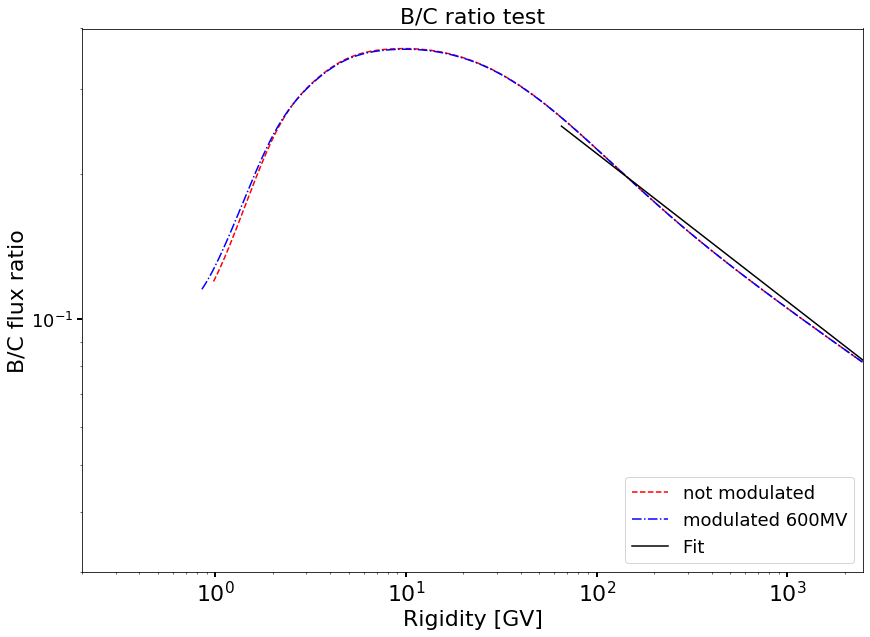

In [19]:
B_C_rigidity_power_law(B_C_rigidity,*poptBC)
make_plot_ratio_fit(B_C_rigidity,B_C_rigidity_mod,B_C_rigidity[B_C_rigidity>R_cutoff],B_C_ratior,B_C_ratior_mod,B_C_rigidity_power_law(B_C_rigidity[B_C_rigidity>R_cutoff],*poptBC))

In [20]:
print(B_C_rigidity[B_C_rigidity>65])

[6.53163693e+01 6.57928905e+01 6.62728881e+01 ... 1.97109045e+06
 1.98547071e+06 1.99995588e+06]


In [21]:
B_C_ratio_obj.fit_ratio(R_cutoff)

In [22]:
B_C_ratio_obj.spectral_index

-0.3062031097959168

In [23]:
poptBC

array([ 0.90301418, -0.30620311])

In [24]:
B_C_ratio_obj.spectral_amplitude

0.9030141837102256

In [26]:
cov=B_C_ratio_obj.covariance

In [31]:
cov

array([[ 7.97099077e-06, -1.41969974e-06],
       [-1.41969974e-06,  2.71530427e-07]])

In [28]:
lcov=np.empty([20,20,2,2])

In [32]:
lcov[0,1]=cov

In [34]:
lcov[0,1]

array([[ 7.97099077e-06, -1.41969974e-06],
       [-1.41969974e-06,  2.71530427e-07]])